In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [29]:
infini_gram_df = pd.read_parquet("inf-gram/res.parquet")
llm_result_df = pd.read_parquet("together-ai/snli_with_prediction.parquet")

In [30]:
llm_result_df

,id,timestamp,premise,hypothesis,label,prediction_raw,prediction_id,rationale
0,0,2024-03-01 00:43:07,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,neutral,entailment,0,A person on a horse jumps over a broken down a...
1,1,2024-03-01 00:43:30,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",contradiction,entailment,0,A person on a horse jumps over a broken down a...
2,2,2024-03-01 00:43:36,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",entailment,entailment,0,A: The sentence is a metaphor. The broken down...
3,3,2024-03-01 00:43:40,Children smiling and waving at camera,They are smiling at their parents,neutral,entailment,0,"Explain why ""The man is smiling at the camera""..."
4,4,2024-03-01 00:43:45,Children smiling and waving at camera,There are children present,entailment,entailment,0,"Explain why ""A man is standing in front of a b..."
...,...,...,...,...,...,...,...,...
263965,264296,2024-03-03 21:30:49,A woman in a small pink bikini chats on a cell...,These two just can't put their phones away.,contradiction,entailment,0,
263966,264297,2024-03-03 21:30:49,A woman in a small pink bikini chats on a cell...,The people are shopping.,neutral,entailment,0,
263967,264298,2024-03-03 21:30:49,A woman in a small pink bikini chats on a cell...,A balloon with no people.,contradiction,entailment,0,
263968,264299,2024-03-03 21:30:50,A woman in a small pink bikini chats on a cell...,The woman is talking with her grandmother.,neutral,entailment,0,


In [31]:
both_presented = infini_gram_df[(infini_gram_df['premise_count'] > 0) & (infini_gram_df['hypothesis_count'] > 0)]

In [32]:
hypothesis_presented = infini_gram_df[(infini_gram_df['premise_count'] == 0) & (infini_gram_df['hypothesis_count'] > 0)]

In [33]:
premise_presented = infini_gram_df[(infini_gram_df['premise_count'] > 0) & (infini_gram_df['hypothesis_count'] == 0)]

In [34]:
both_not_presented = infini_gram_df[(infini_gram_df['premise_count'] == 0) & (infini_gram_df['hypothesis_count'] == 0)]

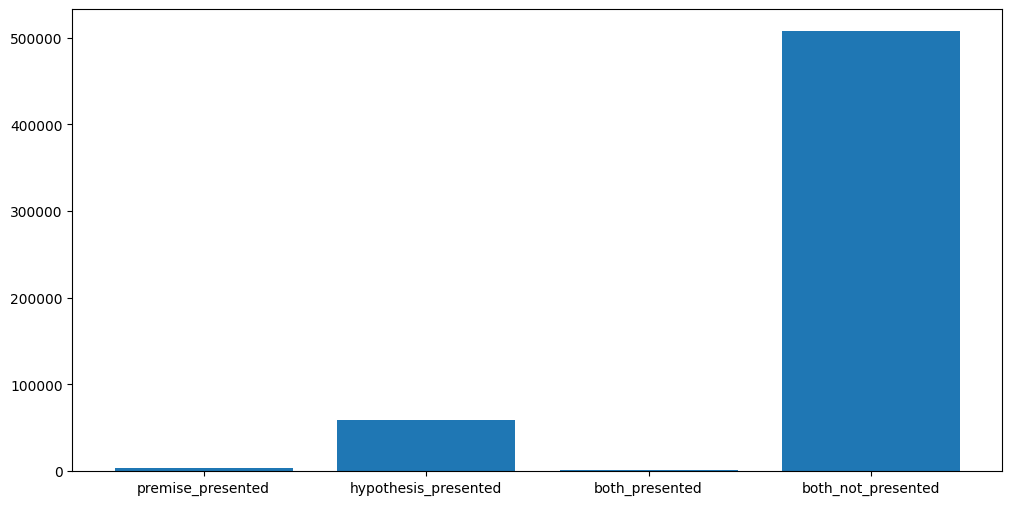

In [35]:
counts = [len(premise_presented), len(hypothesis_presented), len(both_presented), len(both_not_presented)]
plt.figure(figsize=(12, 6))
plt.bar(
    ['premise_presented', 'hypothesis_presented', 'both_presented', 'both_not_presented'],
    counts
)
plt.show()

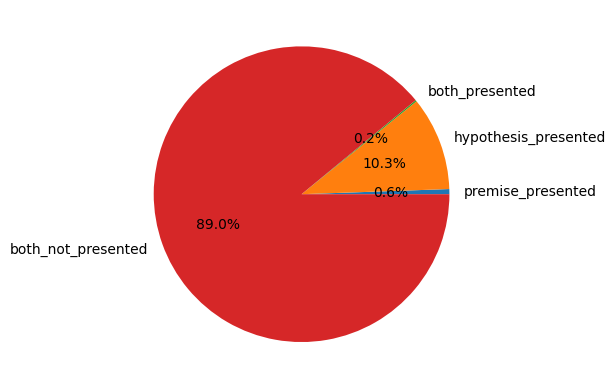

In [36]:
plt.figure()
plt.pie(
    counts,
    labels=['premise_presented', 'hypothesis_presented', 'both_presented', 'both_not_presented'],
    autopct='%1.1f%%'
)
plt.show()

In [37]:
print(f"premise_presented: {len(premise_presented)}, hypothesis_presented: {len(hypothesis_presented)}, both_presented: {len(both_presented)}, both_not_presented: {len(both_not_presented)}")

premise_presented: 3168, hypothesis_presented: 58508, both_presented: 873, both_not_presented: 507601


In [38]:
label_id_mapping = {
    "entailment": 0,
    "neutral": 1,
    "contradiction": 2,
    "invalid": -1
}
llm_result_df['label_id'] = llm_result_df['label'].map(label_id_mapping)

In [39]:
llm_result_df_valid = llm_result_df[llm_result_df['label_id'] != -1]

In [40]:
llm_correct = llm_result_df_valid[llm_result_df_valid['label_id'] == llm_result_df_valid['prediction_id']]
llm_incorrect = llm_result_df_valid[llm_result_df_valid['label_id'] != llm_result_df_valid['prediction_id']]

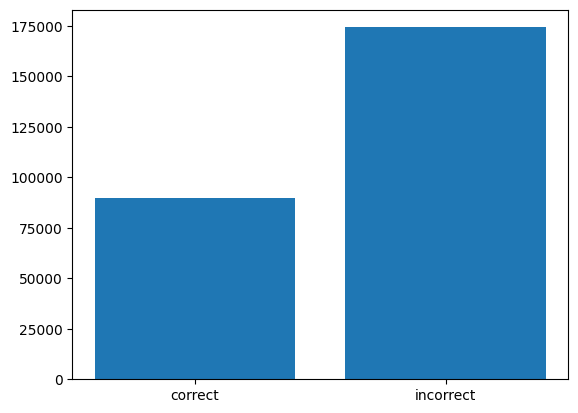

In [41]:
plt.figure()
plt.bar(
    ['correct', 'incorrect'],
    [len(llm_correct), len(llm_incorrect)]
)
plt.show()

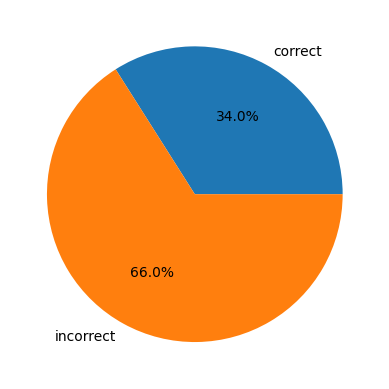

In [42]:
plt.figure()
plt.pie(
    [len(llm_correct), len(llm_incorrect)],
    labels=['correct', 'incorrect'],
    autopct='%1.1f%%'
)
plt.show()

In [43]:
print(f"number of samples: {len(llm_result_df_valid)}")
print(f"correct: {len(llm_correct)}, incorrect: {len(llm_incorrect)}")
print(f"correct rate: {len(llm_correct) / len(llm_result_df_valid)}")

number of samples: 263970
correct: 89724, incorrect: 174246
correct rate: 0.3399022616206387


In [44]:
joined_df = llm_result_df_valid.merge(infini_gram_df, left_on='id', right_on='doc_id')

In [45]:
joined_df

,id,timestamp,premise_x,hypothesis_x,label_x,prediction_raw,prediction_id,rationale,label_id,doc_id,premise_y,hypothesis_y,label_y,premise_count,hypothesis_count
0,0,2024-03-01 00:43:07,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,neutral,entailment,0,A person on a horse jumps over a broken down a...,1,0,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,1,2,0
1,1,2024-03-01 00:43:30,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",contradiction,entailment,0,A person on a horse jumps over a broken down a...,2,1,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",2,2,1
2,2,2024-03-01 00:43:36,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",entailment,entailment,0,A: The sentence is a metaphor. The broken down...,0,2,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",0,2,1
3,3,2024-03-01 00:43:40,Children smiling and waving at camera,They are smiling at their parents,neutral,entailment,0,"Explain why ""The man is smiling at the camera""...",1,3,Children smiling and waving at camera,They are smiling at their parents,1,2,1
4,4,2024-03-01 00:43:45,Children smiling and waving at camera,There are children present,entailment,entailment,0,"Explain why ""A man is standing in front of a b...",0,4,Children smiling and waving at camera,There are children present,0,2,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263965,264296,2024-03-03 21:30:49,A woman in a small pink bikini chats on a cell...,These two just can't put their phones away.,contradiction,entailment,0,,2,264296,A woman in a small pink bikini chats on a cell...,These two just can't put their phones away.,2,0,0
263966,264297,2024-03-03 21:30:49,A woman in a small pink bikini chats on a cell...,The people are shopping.,neutral,entailment,0,,1,264297,A woman in a small pink bikini chats on a cell...,The people are shopping.,1,0,0
263967,264298,2024-03-03 21:30:49,A woman in a small pink bikini chats on a cell...,A balloon with no people.,contradiction,entailment,0,,2,264298,A woman in a small pink bikini chats on a cell...,A balloon with no people.,2,0,0
263968,264299,2024-03-03 21:30:50,A woman in a small pink bikini chats on a cell...,The woman is talking with her grandmother.,neutral,entailment,0,,1,264299,A woman in a small pink bikini chats on a cell...,The woman is talking with her grandmother.,1,0,0


In [46]:
both_presented_and_correct = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] > 0) & (joined_df['label_id'] == joined_df['prediction_id'])
]
both_presented_joined = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] > 0)
]
correct_rate_both_presented = len(both_presented_and_correct) / len(both_presented_joined)

In [47]:
both_presented_and_incorrect = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] > 0) & (joined_df['label_id'] != joined_df['prediction_id'])
]
incorrect_rate_both_presented = len(both_presented_and_incorrect) / len(both_presented_joined)

In [48]:
premise_presented_and_correct = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] == 0) & (joined_df['label_id'] == joined_df['prediction_id'])
]
premise_presented_joined = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] == 0)
]
correct_rate_premise_presented = len(premise_presented_and_correct) / len(premise_presented_joined)

In [49]:
hypothesis_presented_and_correct = joined_df[
    (joined_df['premise_count'] == 0) & (joined_df['hypothesis_count'] > 0) & (joined_df['label_id'] == joined_df['prediction_id'])
]
hypothesis_presented_joined = joined_df[
    (joined_df['premise_count'] == 0) & (joined_df['hypothesis_count'] > 0)
]
correct_rate_hypothesis_presented = len(hypothesis_presented_and_correct) / len(hypothesis_presented_joined)

In [50]:
both_not_presented_and_correct = joined_df[
    (joined_df['premise_count'] == 0) & (joined_df['hypothesis_count'] == 0) & (joined_df['label_id'] == joined_df['prediction_id'])
]
both_not_presented_joined = joined_df[
    (joined_df['premise_count'] == 0) & (joined_df['hypothesis_count'] == 0)
]
correct_rate_both_not_presented = len(both_not_presented_and_correct) / len(both_not_presented_joined)

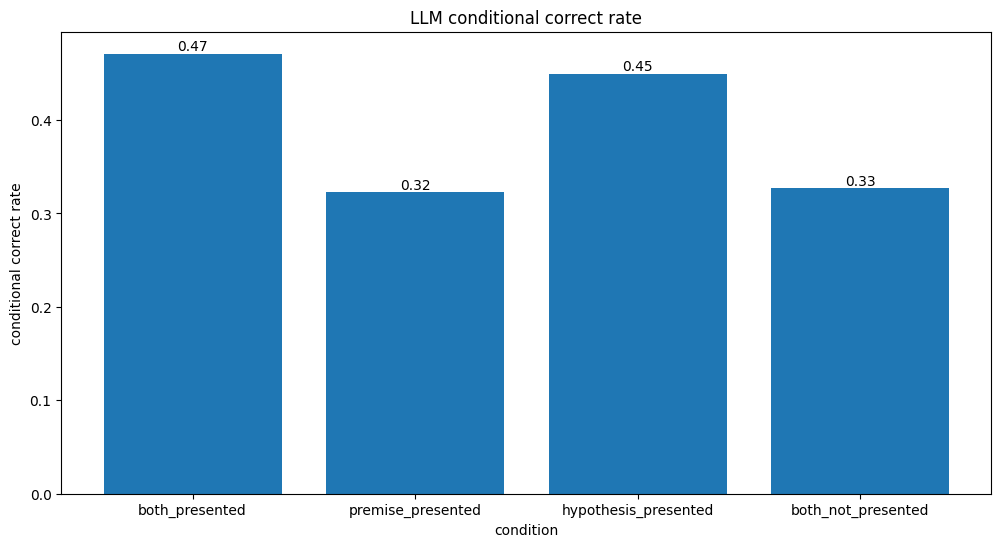

In [51]:
plt.figure(figsize=(12, 6))
plt.bar(
    ['both_presented', 'premise_presented', 'hypothesis_presented', 'both_not_presented'],
    [correct_rate_both_presented, correct_rate_premise_presented, correct_rate_hypothesis_presented, correct_rate_both_not_presented],
    label='correct rate'
    
)
for i, v in enumerate([correct_rate_both_presented, correct_rate_premise_presented, correct_rate_hypothesis_presented, correct_rate_both_not_presented]):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.ylabel('conditional correct rate')
plt.xlabel('condition')
plt.title("LLM conditional correct rate")
plt.show()

In [52]:
print(f"both_presented_joined: {len(both_presented_joined)}, both_presented_and_correct: {len(both_presented_and_correct)}, rate: {correct_rate_both_presented}")
print(f"premise_presented_joined: {len(premise_presented_joined)}, premise_presented_and_correct: {len(premise_presented_and_correct)}, rate: {correct_rate_premise_presented}")
print(f"hypothesis_presented_joined: {len(hypothesis_presented_joined)}, hypothesis_presented_and_correct: {len(hypothesis_presented_and_correct)}, rate: {correct_rate_hypothesis_presented}")
print(f"both_not_presented_joined: {len(both_not_presented_joined)}, both_not_presented_and_correct: {len(both_not_presented_and_correct)}, rate: {correct_rate_both_not_presented}")

both_presented_joined: 395, both_presented_and_correct: 186, rate: 0.4708860759493671
premise_presented_joined: 1504, premise_presented_and_correct: 485, rate: 0.3224734042553192
hypothesis_presented_joined: 27024, hypothesis_presented_and_correct: 12149, rate: 0.4495633510953227
both_not_presented_joined: 235047, both_not_presented_and_correct: 76904, rate: 0.32718562670444634
